In [ ]:
!pip install pytubefix

In [ ]:
!pip install scrapetube

In [ ]:
!pip install lightgbm

In [ ]:
!pip install -U scikit-learn


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import CategoricalNB
from sklearn.multioutput import ClassifierChain
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.utils import all_estimators


estimators = all_estimators(type_filter='classifier')
classification_estimators = []
i = 1
for name, class_ in estimators:
    classification_estimators.append(class_.__name__)

In [ ]:
from sklearn.base import is_classifier, is_regressor
import pandas as pd

dat = []


In [ ]:
is_regressor(

In [1]:
x=0
z=""
while x<41:
    z+="x"+str(x)+"prob+"
    x+=1
z

'x0prob+x1prob+x2prob+x3prob+x4prob+x5prob+x6prob+x7prob+x8prob+x9prob+x10prob+x11prob+x12prob+x13prob+x14prob+x15prob+x16prob+x17prob+x18prob+x19prob+x20prob+x21prob+x22prob+x23prob+x24prob+x25prob+x26prob+x27prob+x28prob+x29prob+x30prob+x31prob+x32prob+x33prob+x34prob+x35prob+x36prob+x37prob+x38prob+x39prob+x40prob+'

In [ ]:
x=0
for c in classification_estimators:
    c = eval(c)
    if(is_regressor(c)==True):
        
        print("    prob=x"+str(x)+".predict_proba(er)")
        print("    prob=str(prob)")
        print("    prob=prob.replace('[','')")
        print("    prob=prob.replace(']','')")
        print("    prob=prob.split(' ')[0]")
        print("    x"+str(x)+"prob=float(prob)")
        x+=1
    else:
        print("    prob=x"+str(x)+".predict_proba(er)")
        print("    prob=str(prob)")
        print("    prob=prob.replace('[','')")
        print("    prob=prob.replace(']','')")
        print("    prob=prob.split(' ')[0]")
        print("    x"+str(x)+"prob=float(prob)")
        x+=1

In [1]:
!pip install scikit-learn
!pip install playwright
!playwright install
!playwright install-deps
print("done!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 35.8 MB/s eta 0:00:00:00:0100:01
(node:67) [DEP0169] DeprecationWarning: `url.parse()` behavior is not standardized and prone to errors that have security implications. Use the WHATWG URL API instead. CVEs are not issued for `url.parse()` vulnerabilities.
(Use `node --trace-deprecation ...` to show where the warning was created)
164.7 MiB [                    ] 0% 0.0s164.7 MiB [                    ] 0% 40.7s164.7 MiB [                    ] 0% 16.7s164.7 MiB [                    ] 0% 11.7s164.7 MiB [                    ] 1% 6.0s164.7 MiB [                    ] 1% 4.1s164.7 MiB [=                   ] 2% 3.3s164.7 MiB [=                   ] 3% 3.0s164.7 MiB [=                   ] 4% 3.1s164.7 MiB [=                   ] 5% 2.7s164.7 MiB [=                   ] 6% 2.4s164.7 MiB [=                   ] 7% 2.2s164.7 MiB [==                  ] 8% 2.1s164.7 MiB [==                  ] 9% 2.1s164.7 MiB [==                  ] 10% 2.0s164.7 Mi

In [46]:
import pandas as pd
from playwright.async_api import async_playwright
import asyncio
async def fetch(link):
    async with async_playwright() as p:
        browser=await p.chromium.launch(headless=True)
        page=await browser.new_page()
        await page.goto(link,wait_until="load")
        last=None
        for _ in range(10):
            await page.wait_for_load_state("networkidle")
            new=page.url
            if new==last:
                break
            last=new
        try:
            await page.wait_for_selector("table")
        except Exception as e:
            print(e)
        html=await page.content()
        await browser.close()
        soup=BeautifulSoup(html)
        return soup
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
import asyncio



async def fetchz(link, context):
    page = await context.new_page()
    await page.route("**/*", lambda route: route.abort() if route.request.resource_type in ["image", "stylesheet", "font"] else route.continue_())
    await page.goto(link, wait_until="domcontentloaded",timeout=0)
    last = None
    for _ in range(10):
        await page.wait_for_load_state("networkidle")
        new = page.url
        if new == last:
            break
        last = new
    try:
        await page.wait_for_selector("table",state="attached")
    except Exception as e:
        print(e)
    element = await page.query_selector("table")
    html = await element.inner_html()
    soup = BeautifulSoup(html, "html.parser")
    await page.close()
    return soup

async def main(link):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True,args=["--disable-gpu", "--no-sandbox"])
        context = await browser.new_context()
        result = await fetchz(link,context)
        await browser.close()
        return result
dates={}
import nest_asyncio
nest_asyncio.apply()
dates=[]
arrw=[]
for i in range(2019,2027):
    if i!=2020:
        dates.append(i)
for s in dates:
    print(s)
    uk=int(s)-1
    s=str(s)
    nj=s.replace(".0","")
    s=s.replace(".0","")
    url='https://barttorvik.com/teamsheets.php?year='+str(s)
    print(url)
    loop = asyncio.get_event_loop()
    table = loop.run_until_complete(main(url))
    for tr in table.find_all("tr"):
        if "AdjOE" not in str(tr) and 'absolute error' not in str(tr) and 'RESUME' not in str(tr) and 'KPI' not in str(tr):
            rowz=[]
            n=0
            for td in tr.find_all("td"):
                if 1==1:
                    if int(s)<2024 and n==8:
                        m=1
                    elif int(s)==2025 and n==5:
                        m=1
                    elif int(s)==2025 and n==9:
                        m=1
                    elif int(s)==2026 and n==5:
                        m=1
                    elif int(s)==2026 and n==9:
                        m=1
                    elif n==1:
                        fd=td.find_all("a")[0].text
                        fd=str(fd)
                        if fd=='':
                            print(tr.find_all("td"))
                        rowz.append(fd)
                    else:
                        rowz.append(td.text)
                n+=1
            rowz.append(uk)
            arrw.append(rowz)
dfe=pd.DataFrame(arrw)
dfe.columns=['rk','team','net','kpi','sor','avg','bpi','kp','avgz','q1a','q1','q2','q12','q3','q4','season']
for i in range(2018,2027):
    dfe=dfe[dfe.rk!=i]
dfe=dfe.replace('\xa0', ' ', regex=True)
for row in dfe.itertuples():
    if "   " in str(row.team):
        teamh=str(row.team).split("   ")[0]
        dfe.at[row.Index,'team']=teamh
dfe['team']=dfe['team'].str.replace(" St."," State")
dfe=dfe.replace("Albany","Albany (NY)")
dfe=dfe.replace("BYU","Brigham Young")
dfe=dfe.replace("Grambling State","Grambling")
dfe=dfe.replace("VCU","Virginia Commonwealth")
dfe=dfe.replace("Fairleigh Dickinson","FDU")
dfe=dfe.replace("SIU Edwardsville","Southern Illinois-Edwardsville")
dfe=dfe.replace("LIU","Long Island University")
dfe=dfe.replace("Nebraska Omaha","Omaha")
dfe=dfe.replace("UMBC","Maryland-Baltimore County")
dfe=dfe.replace("Miami FL","Miami (FL)")
dfe=dfe.replace("SMU","Southern Methodist")
dfe=dfe.replace("Penn","Pennsylvania")
dfe=dfe.replace("Arkansas Pine Bluff","Arkansas-Pine Bluff")
dfe=dfe.replace("USC Upstate","South Carolina Upstate")
dfe=dfe.replace("St. Francis NY","St. Francis (NY)")
dfe=dfe.replace("UMKC","Kansas City")
dfe=dfe.replace("Central Connecticut","Central Connecticut State")
dfe=dfe.replace("Tennessee Martin","Tennessee-Martin")
dfe=dfe.replace("Saint Francis","Saint Francis (PA)")
dfe=dfe.replace("Illinois Chicago","Illinois-Chicago")
dfe=dfe.replace("Bethune Cookman","Bethune-Cookman")
dfe=dfe.replace("N.C. State","NC State")
dfe=dfe.replace("Charleston","College of Charleston")
dfe=dfe.replace("Maryland Eastern Shore","Maryland-Eastern Shore")
dfe=dfe.replace("Loyola Chicago","Loyola (IL)")
dfe=dfe.replace("Louisiana Monroe","Louisiana-Monroe")
dfe=dfe.replace("Southern Miss","Southern Mississippi")
dfe=dfe.replace("Texas A&M Corpus Chris","Texas A&M-Corpus Christi")
dfe=dfe.replace("Saint Mary's","Saint Mary's (CA)")
dfe=dfe.replace("UT Rio Grande Valley","Texas-Rio Grande Valley")
dfe=dfe.replace("Gardner Webb","Gardner-Webb")
dfe=dfe.replace("LSU","Louisiana State")
dfe=dfe.replace("Loyola MD","Loyola (MD)")
dfe=dfe.replace("UMass Lowell","Massachusetts-Lowell")
dfe=dfe.replace("UNLV","Nevada-Las Vegas")
dfe=dfe.replace("USC","Southern California")
dfe=dfe.replace("Sam Houston State","Sam Houston")
dfe=dfe.replace("Prairie View A&M","Prairie View")
dfe=dfe.replace("Miami OH","Miami (OH)")
dfe=dfe.replace("VMI","Virginia Military Institute")
dfe=dfe.replace("St. John's","St. John's (NY)")
dfe=dfe.replace("FIU","Florida International")
dfe=dfe.replace("Queens","Queens (NC)")
dfe=dfe.replace("Cal Baptist","California Baptist")
dfe=dfe.replace("Mount State Mary's","Mount St. Mary's")
rez={}
dfe=dfe.astype({"net":float,"rk":float,"kpi":float,"sor":float,"bpi":float,"kp":float})
rez={}
for i in range(2017,2027):
    rez[i]={}
for row in dfe.itertuples():
    q1w=float(str(row.q1).split("-")[0])
    q1l=float(str(row.q1).split("-")[1])
    q2w=float(str(row.q2).split("-")[0])
    q2l=float(str(row.q2).split("-")[1])
    q3w=float(str(row.q3).split("-")[0])
    q3l=float(str(row.q3).split("-")[1])
    q4w=float(str(row.q4).split("-")[0])
    q4l=float(str(row.q4).split("-")[1])
    q1aw=float(str(row.q1a).split("-")[0])
    q1al=float(str(row.q1a).split("-")[1])
    tgz=q1w+q1l+q2w+q2l+q3w+q3l+q4w+q4l
    w=q1w+q2w+q3w+q4w
    rez[int(row.season)][row.team]={'resrk':row.rk,'net':row.net,'kpi':row.kpi,'sor':row.sor,'avg':row.avg,'bpi':row.bpi,'kp':row.kp,
'avgz':row.avgz,'q1w':q1w,'q2w':q2w,'q3w':q3w,'q4w':q4w,'q1l':q1l,'q2l':q2l,'q3l':q3l,'q4l':q4l,'q1aw':q1aw,'q1al':q1al}
arrw=[]

from playwright.async_api import async_playwright
import asyncio
from sklearn.pipeline import Pipeline

async def fetch(link):
    async with async_playwright() as p:
        browser=await p.chromium.launch(headless=True)
        page=await browser.new_page()
        await page.goto(link,wait_until="load")
        last=None
        for _ in range(10):
            await page.wait_for_load_state("networkidle")
            new=page.url
            if new==last:
                break
            last=new
        try:
            await page.wait_for_selector("table")
        except Exception as e:
            print(e)
        html=await page.content()
        await browser.close()
        soup=BeautifulSoup(html)
        return soup
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
import asyncio



async def fetchz(link, context):
    page = await context.new_page()
    await page.route("**/*", lambda route: route.abort() if route.request.resource_type in ["image", "stylesheet", "font"] else route.continue_())
    await page.goto(link, wait_until="domcontentloaded",timeout=0)
    last = None
    for _ in range(10):
        await page.wait_for_load_state("networkidle")
        new = page.url
        if new == last:
            break
        last = new
    try:
        await page.wait_for_selector("table",state="attached")
    except Exception as e:
        print(e)
    element = await page.query_selector("table")
    html = await element.inner_html()
    soup = BeautifulSoup(html, "html.parser")
    await page.close()
    return soup

async def main(link):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True,args=["--disable-gpu", "--no-sandbox"])
        context = await browser.new_context()
        result = await fetchz(link,context)
        await browser.close()
        return result
dates={}
import nest_asyncio
nest_asyncio.apply()
from datetime import date
today=date.today()
today=str(today)
today=today.replace("-","")
dates=[float(today)]
arrw=[]
for d in dates:
    d=str(d)
    d=d.replace(".0","")
    url="https://barttorvik.com/trank.php?year=2026&sort=&hteam=&t2value=&conlimit=All&state=All&begin=20251103&end="+str(d)+"&top=0&revquad=0&quad=5&venue=All&type=All&mingames=0#"
    print(url)
    loop = asyncio.get_event_loop()
    table = loop.run_until_complete(main(url))
    for tr in table.find_all("tr"):
        if "AdjOE" not in str(tr) and 'absolute error' not in str(tr):
            rowz=[]
            n=0
            for td in tr.find_all("td"):
                if n!=4:
                    rowz.append(td.text)
                else:
                    fd=td.find_all("a")[0].text
                    fd=str(fd)
                    if fd=='':
                        print(tr.find_all("td"))
                    rowz.append(fd)
                n+=1
            rowz.append(2025)
            arrw.append(rowz)
df=pd.DataFrame(arrw)
df.columns=['RK','team','conf','G','Rec','ADJOE','ADJDE','BARTHAG','EFG','EFGD','TOR','TORD','ORB','DRB','FTR','FTRD','2P','2PD','3P','3PD','3PR','3PRD','ADJT','WAB','season']
df=df[df.RK!=2026]
def safe_apply_class_weight(model):
    """
    Safely applies class_weight='balanced' to any sklearn classifier,
    including meta-estimators. Never raises errors.
    """
    # Case 1: model supports class_weight directly
    try:
        model.set_params(class_weight="balanced")
        return model
    except Exception:
        pass

    # Case 2: model has base_estimator (CalibratedClassifierCV, etc.)
    if hasattr(model, "base_estimator") and model.base_estimator is not None:
        try:
            model.base_estimator.set_params(class_weight="balanced")
            return model
        except Exception:
            pass

    # Case 3: model has estimator (OneVsRest, OneVsOne, MultiOutput)
    if hasattr(model, "estimator") and model.estimator is not None:
        try:
            model.estimator.set_params(class_weight="balanced")
            return model
        except Exception:
            pass

    # Case 4: model has estimators_ (Voting, Stacking after fit)
    if hasattr(model, "estimators_"):
        for est in model.estimators_:
            try:
                est.set_params(class_weight="balanced")
            except Exception:
                pass
        return model

    # Case 5: model has estimators (Voting, Stacking before fit)
    if hasattr(model, "estimators"):
        for name, est in model.estimators:
            if est is not None:
                try:
                    est.set_params(class_weight="balanced")
                except Exception:
                    pass
        return model

    # If nothing worked, return unchanged
    return model
df=df[df.RK!=2025]
df=df.drop("WAB",axis=1)
df['team']=df['team'].dropna()
for row in df.itertuples():
    s = row.team
    result = s.split("\xa0\xa0\xa0", 1)[0]
    df.at[row.Index,"team"]=result

x=[]
y=[]
import os
u=0
arrp=[]
import requests
from bs4 import BeautifulSoup
import numpy as np
s=2024
cs={}
u=0
pct={}
votes=[]
votes=[]
pcts={}
yw=0
for i in range(0,12):
    pcts[str(i)]={}
bartdf=pd.read_csv("https://cfbzzz.alwaysdata.net/bracketology/goodbart.txt")
bartdf=bartdf.drop("WAB",axis=1)
aldf=pd.read_csv("https://cfbzzz.alwaysdata.net/bracketology/al.txt")
for i in range(2013,2026):
    print(i)
    bartdf=bartdf[bartdf.RK!=i]
bartdf=bartdf.replace('\xa0', ' ', regex=True)
bartdf['ty']=False
for row in bartdf.itertuples():
    if "   " in str(row.team):
        bartdf.at[row.Index,'ty']=True
        teamh=str(row.team).split("   ")[0]
        bartdf.at[row.Index,'team']=teamh
bartdf['team']=bartdf['team'].str.replace(" St."," State")
bartdf=bartdf.replace("Albany","Albany (NY)")
bartdf=bartdf.replace("BYU","Brigham Young")
bartdf=bartdf.replace("Grambling State","Grambling")
bartdf=bartdf.replace("VCU","Virginia Commonwealth")
bartdf=bartdf.replace("Fairleigh Dickinson","FDU")
bartdf=bartdf.replace("SIU Edwardsville","Southern Illinois-Edwardsville")
bartdf=bartdf.replace("LIU","Long Island University")
bartdf=bartdf.replace("Nebraska Omaha","Omaha")
bartdf=bartdf.replace("UMBC","Maryland-Baltimore County")
bartdf=bartdf.replace("Miami FL","Miami (FL)")
bartdf=bartdf.replace("SMU","Southern Methodist")
bartdf=bartdf.replace("Penn","Pennsylvania")
bartdf=bartdf.replace("Arkansas Pine Bluff","Arkansas-Pine Bluff")
bartdf=bartdf.replace("USC Upstate","South Carolina Upstate")
bartdf=bartdf.replace("St. Francis NY","St. Francis (NY)")
bartdf=bartdf.replace("UMKC","Kansas City")
bartdf=bartdf.replace("Central Connecticut","Central Connecticut State")
bartdf=bartdf.replace("Tennessee Martin","Tennessee-Martin")
bartdf=bartdf.replace("Saint Francis","Saint Francis (PA)")
bartdf=bartdf.replace("Illinois Chicago","Illinois-Chicago")
bartdf=bartdf.replace("Bethune Cookman","Bethune-Cookman")
bartdf=bartdf.replace("N.C. State","NC State")
bartdf=bartdf.replace("Charleston","College of Charleston")
bartdf=bartdf.replace("Maryland Eastern Shore","Maryland-Eastern Shore")
bartdf=bartdf.replace("Loyola Chicago","Loyola (IL)")
bartdf=bartdf.replace("Louisiana Monroe","Louisiana-Monroe")
bartdf=bartdf.replace("Southern Miss","Southern Mississippi")
bartdf=bartdf.replace("Texas A&M Corpus Chris","Texas A&M-Corpus Christi")
bartdf=bartdf.replace("Saint Mary's","Saint Mary's (CA)")
bartdf=bartdf.replace("UT Rio Grande Valley","Texas-Rio Grande Valley")
bartdf=bartdf.replace("Gardner Webb","Gardner-Webb")
bartdf=bartdf.replace("LSU","Louisiana State")
bartdf=bartdf.replace("Loyola MD","Loyola (MD)")
bartdf=bartdf.replace("UMass Lowell","Massachusetts-Lowell")
bartdf=bartdf.replace("UNLV","Nevada-Las Vegas")
bartdf=bartdf.replace("USC","Southern California")
bartdf=bartdf.replace("Sam Houston State","Sam Houston")
bartdf=bartdf.replace("Prairie View A&M","Prairie View")
bartdf=bartdf.replace("Miami OH","Miami (OH)")
bartdf=bartdf.replace("VMI","Virginia Military Institute")
bartdf=bartdf.replace("St. John's","St. John's (NY)")
bartdf=bartdf.replace("FIU","Florida International")
bartdf=bartdf.replace("Queens","Queens (NC)")
bartdf=bartdf.replace("Cal Baptist","California Baptist")
bartdf=bartdf.replace("Mount State Mary's","Mount St. Mary's")
alargez={}
for i in range(1949,2026):
    alargez[float(i)]=[]
for row in aldf.itertuples():
    if float(row.TY)==1:
        alargez[float(row.Year)].append(row.Team)
for row in bartdf.itertuples():
    if row.team in alargez[float(row.season)]:
        bartdf.at[row.Index,'alarge']=1
    elif row.ty==True:
        bartdf=bartdf.drop(row.Index)
    else:
        bartdf.at[row.Index,'alarge']=0
conft={}
o=0
for cf in set(bartdf.conf.tolist()):
    conft[cf]=0
    o+=1  
bartdf=bartdf.rename(columns={"2P":"P2","2PD":"P2D","3P":"P3","3PD":"P3D","3PR":"P3R","3PRD":"PR3D"})
bartdf['pct']=0
bartdf=bartdf[bartdf.season>2017]
for row in bartdf.itertuples():
    bartdf.at[row.Index,'resrk']=rez[int(row.season)][row.team]['resrk']
    bartdf.at[row.Index,'sor']=rez[int(row.season)][row.team]['sor']
    bartdf.at[row.Index,'bpi']=rez[int(row.season)][row.team]['bpi']
    bartdf.at[row.Index,'net']=rez[int(row.season)][row.team]['net']
    bartdf.at[row.Index,'kp']=rez[int(row.season)][row.team]['kp']
    bartdf.at[row.Index,'kpi']=rez[int(row.season)][row.team]['kpi']
    bartdf.at[row.Index,'q1w']=rez[int(row.season)][row.team]['q1w']
    bartdf.at[row.Index,'q2w']=rez[int(row.season)][row.team]['q2w']
    bartdf.at[row.Index,'q3w']=rez[int(row.season)][row.team]['q3w']
    bartdf.at[row.Index,'q4w']=rez[int(row.season)][row.team]['q4w']
    bartdf.at[row.Index,'q1l']=rez[int(row.season)][row.team]['q1l']
    bartdf.at[row.Index,'q2l']=rez[int(row.season)][row.team]['q2l']
    bartdf.at[row.Index,'q3l']=rez[int(row.season)][row.team]['q3l']
    bartdf.at[row.Index,'q4l']=rez[int(row.season)][row.team]['q4l']
    bartdf.at[row.Index,'q1aw']=rez[int(row.season)][row.team]['q1aw']
    bartdf.at[row.Index,'q1al']=rez[int(row.season)][row.team]['q1al']
for row in bartdf.itertuples():
    rec=str(row.Rec)
    w=str(rec).split("–")[0]
    l=str(rec).split("–")[1]
    w=float(w)
    l=float(l)
    pctz=1/(w+l)*w
    pct=str(row.Rec)
    w=pct.split("–")[0]
    l=pct.split("–")[1]
    w=float(w)
    l=float(l)
    pct=w/(w+l)
    bartdf.at[row.Index,'pct']=pct
def add_quad_sos_features(dfz):

    # -----------------------------
    # Total games
    # -----------------------------
    dfz["games"] = (
        dfz["q1w"] + dfz["q1l"] +
        dfz["q2w"] + dfz["q2l"] +
        dfz["q3w"] + dfz["q3l"] +
        dfz["q4w"] + dfz["q4l"]
    )
    
    # -----------------------------
    # Quadrant game counts
    # -----------------------------
    dfz["q1_games"] = dfz["q1w"] + dfz["q1l"]
    dfz["q2_games"] = dfz["q2w"] + dfz["q2l"]
    dfz["q3_games"] = dfz["q3w"] + dfz["q3l"]
    dfz["q4_games"] = dfz["q4w"] + dfz["q4l"]
    dfz['q4_dominance']=dfz['q4_games'] / dfz['games']
    dfz['q4_loss_ratio']=dfz['q4l'] / dfz['q4_games']
    # Q1A games (premium Q1)
    dfz["q1a_games"] = dfz["q1aw"] + dfz["q1al"]

    # -----------------------------
    # Quadrant shares
    # -----------------------------
    safe_games = dfz["games"].replace(0, 1)

    dfz["q1_share"] = dfz["q1_games"] / safe_games
    dfz["q2_share"] = dfz["q2_games"] / safe_games
    dfz["q3_share"] = dfz["q3_games"] / safe_games
    dfz["q4_share"] = dfz["q4_games"] / safe_games

    # Share of Q1 that is Q1A
    dfz["q1a_share_of_q1"] = dfz["q1a_games"] / dfz["q1_games"].replace(0, 1)

    # -----------------------------
    # Opportunity / cupcake indicators
    # -----------------------------
    dfz["hi_opportunity_share"] = (dfz["q1_games"] + dfz["q2_games"]) / safe_games
    dfz["cupcake_share"] = (dfz["q3_games"] + dfz["q4_games"]) / safe_games

    # -----------------------------
    # Weighted SOS proxy
    # -----------------------------
    dfz["quad_sos"] = (
        4 * dfz["q1_games"] +
        3 * dfz["q2_games"] +
        2 * dfz["q3_games"] +
        1 * dfz["q4_games"]
    )

    dfz["quad_sos_per_game"] = dfz["quad_sos"] / safe_games

    # -----------------------------
    # Weighted win quality
    # (Q1A wins > Q1 wins > Q2 wins > Q3 wins > Q4 wins)
    # -----------------------------
    dfz["quad_win_quality"] = (
        5 * dfz["q1aw"] +                                # premium wins
        4 * (dfz["q1w"] - dfz["q1aw"]) +                  # other Q1 wins
        3 * dfz["q2w"] +
        2 * dfz["q3w"] +
        1 * dfz["q4w"]
    )

    # -----------------------------
    # Weighted loss severity
    # (Q4 losses worst, Q1A losses least harmful)
    # -----------------------------
    dfz["quad_loss_severity"] = (
        5 * dfz["q4l"] +                                 # worst losses
        4 * dfz["q3l"] +
        2 * dfz["q2l"] +
        1 * (dfz["q1l"] - dfz["q1al"]) +                  # normal Q1 losses
        0.5 * dfz["q1al"]                                # Q1A losses least harmful
    )

    return dfz

bartdf=add_quad_sos_features(bartdf)
m=0
df=df[df.RK!=2025]
bartdf=bartdf[bartdf.season>2017]
df=df.rename(columns={"2P":"P2","2PD":"P2D","3P":"P3","3PD":"P3D","3PR":"P3R","3PRD":"PR3D"})

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
# Add these imports at the top of your file
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
bartdf=bartdf.fillna(0)
numeric_features = ['pct','EFG', 'EFGD', 
                    'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', 
                    'P2', 'P2D', 'P3', 'P3D', 'P3R', 'PR3D', 'ADJT','net','sor','kpi',
                    'bpi',"kp","q1w","q2w","q3w","q4w",'q1l','q2l','q3l','q4l','q1_games','q2_games',
                   'q3_games','q4_games','hi_opportunity_share','cupcake_share','quad_sos_per_game','q1aw','q1al','q1a_share_of_q1','quad_win_quality','quad_sos','quad_loss_severity','q4_dominance','q4_loss_ratio']
categorical_features = ['conf']  # categorical feature(s)


x = bartdf[numeric_features + categorical_features]
y = bartdf['alarge']  # 1 if team made tournament w/o auto bid, 0 otherwise
y=y.astype(int)
preprocessor_scaled = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])

# For models that do not need scaling (trees, ensembles)
preprocessor_unscaled = ColumnTransformer([
    ('num', 'passthrough', numeric_features),
    ('cat', OneHotEncoder(), categorical_features)
])
pipelines = {}
from sklearn.utils import all_estimators

classifiers = all_estimators(type_filter="classifier")
fitted_models = {}
import pandas as pd
import numpy as np
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Classifiers that need extra parameters and their defaults
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.base import BaseEstimator

# ---------------------------
# 1. Define features
numeric_features = ['pct','EFG', 'EFGD', 
                    'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', 
                    'P2', 'P2D', 'P3', 'P3D', 'P3R', 'PR3D', 'ADJT','net','sor','kpi',
                    'bpi',"kp","q1w","q2w","q3w","q4w",'q1l','q2l','q3l','q4l','q1_games','q2_games',
                   'q3_games','q4_games','hi_opportunity_share','cupcake_share','quad_sos_per_game','q1aw','q1al','q1a_share_of_q1','quad_win_quality','quad_sos','quad_loss_severity','q4_dominance','q4_loss_ratio']
categorical_features = ['conf']  # conference

# Assume x is your DataFrame of features, y is your target
# ---------------------------
# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
import pandas as pd
import numpy as np
from sklearn.utils import all_estimators
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Linear models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier

# Neural networks
from sklearn.neural_network import MLPClassifier

# Tree-based ensembles
from sklearn.ensemble import (ExtraTreesClassifier, RandomForestClassifier, 
                              GradientBoostingClassifier, AdaBoostClassifier,
                              BaggingClassifier, HistGradientBoostingClassifier,
                              StackingClassifier, VotingClassifier)

# Decision trees
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# Naive Bayes
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB, CategoricalNB

# SVM / linear models
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import SGDClassifier, RidgeClassifier, RidgeClassifierCV, Perceptron

# Meta-classifiers
from sklearn.multioutput import ClassifierChain, MultiOutputClassifier
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.calibration import CalibratedClassifierCV

# Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Neighbors
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier, NearestCentroid
# ---------------------------
# 3. List all classifiers
classifiers = all_estimators(type_filter="classifier")
fitted_models = {}

# ---------------------------
# 4. Loop through classifiers
from sklearn.utils import all_estimators

def supports_class_weight(Clf):
    """
    Returns True if the classifier supports class_weight.
    """
    try:
        # Try to instantiate with no args
        model = Clf()
    except TypeError:
        # If the model requires arguments, inspect its signature instead
        try:
            params = Clf().get_params()
        except:
            return False
    else:
        params = model.get_params()

    return "class_weight" in params


# Example: test all classifiers
classifiers = all_estimators(type_filter="classifier")
def safe_apply_class_weight(model):
    """
    Safely applies class_weight='balanced' to any sklearn classifier,
    including meta-estimators. Never raises errors.
    """
    # Case 1: model supports class_weight directly
    try:
        model.set_params(class_weight="balanced")
        return model
    except Exception:
        pass

    # Case 2: model has base_estimator (CalibratedClassifierCV, etc.)
    if hasattr(model, "base_estimator") and model.base_estimator is not None:
        try:
            model.base_estimator.set_params(class_weight="balanced")
            return model
        except Exception:
            pass

    # Case 3: model has estimator (OneVsRest, OneVsOne, MultiOutput)
    if hasattr(model, "estimator") and model.estimator is not None:
        try:
            model.estimator.set_params(class_weight="balanced")
            return model
        except Exception:
            pass

    # Case 4: model has estimators_ (Voting, Stacking after fit)
    if hasattr(model, "estimators_"):
        for est in model.estimators_:
            try:
                est.set_params(class_weight="balanced")
            except Exception:
                pass
        return model

    # Case 5: model has estimators (Voting, Stacking before fit)
    if hasattr(model, "estimators"):
        for name, est in model.estimators:
            if est is not None:
                try:
                    est.set_params(class_weight="balanced")
                except Exception:
                    pass
        return model

    # If nothing worked, return unchanged
    return model

##do test accuracy
fitted_models={}
for name, Clf in classifiers:
    try:
        # Handle classifiers that need extra parameters
        # Handle classifiers that need extra parameters
        if name == "LogisticRegression":
            model = LogisticRegression(max_iter=5000, random_state=42)
        elif name == "LogisticRegressionCV":
            model = LogisticRegressionCV(max_iter=5000, cv=5, random_state=42)
        elif name == "MLPClassifier":
            model = MLPClassifier(max_iter=2000, random_state=42)
        elif name == "PassiveAggressiveClassifier":
            # wrap in CalibratedClassifierCV to get probabilities if needed
            from sklearn.calibration import CalibratedClassifierCV
            base = PassiveAggressiveClassifier(max_iter=1000, random_state=42)
            model = CalibratedClassifierCV(base_estimator=base, cv=5)
        elif name == "CalibratedClassifierCV":
            model = Clf(base_estimator=LogisticRegression(max_iter=2000, random_state=42), cv=5)
        elif name == "ClassifierChain":
            model = Clf(base_estimator=LogisticRegression(max_iter=2000, random_state=42))
        elif name == "MultiOutputClassifier":
            model = Clf(estimator=LogisticRegression(max_iter=2000, random_state=42))
        elif name == "OneVsOneClassifier":
            model = Clf(estimator=LogisticRegression(max_iter=2000, random_state=42))
        elif name == "OneVsRestClassifier":
            model = Clf(estimator=LogisticRegression(max_iter=2000, random_state=42))
        elif name == "StackingClassifier":
            model = Clf(estimators=[])
        elif name=='ExtraTreesClassifier':
            model=CalibratedClassifierCV( ExtraTreesClassifier( n_estimators=500, max_depth=10, min_samples_leaf=5, class_weight="balanced", random_state=42 ), cv=5 )
        elif name == "VotingClassifier":
            model = Clf(estimators=[])
        else:
            # Try default init with random_state if it exists
            kwargs = {}
            if 'random_state' in Clf().get_params():
                kwargs['random_state'] = 42
            model = Clf(**kwargs)
        if supports_class_weight(Clf):
            model=safe_apply_class_weight(model)
    except TypeError as e:
        print(f"❌ {name} skipped: needs extra parameters ({e})")
        continue

    # ---------------------------
    # Determine if scaling is needed
    if name in ['LogisticRegression', 'LogisticRegressionCV', 'MLPClassifier', 'CalibratedClassifierCV']:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', 'passthrough', numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # ---------------------------
    # Build pipeline
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    # ---------------------------
    # Fit the pipeline
    try:
        pipe.fit(X_train, y_train)
        fitted_models[name] = pipe
        print(f"✅ {name} fitted")
    except Exception as e:
        print(f"❌ {name} skipped during fit: {e}")

# ---------------------------
# 5. Optional: Get probabilities for classifiers that support it
from sklearn.metrics import accuracy_score

test_accuracy = {}

for name, model in fitted_models.items():
    if name == "RadiusNeighborsClassifier":
        continue
    try:
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        test_accuracy[name] = acc
    except Exception as e:
        print(f"❌ {name} failed on test set: {e}")
acc=sorted(test_accuracy,key=test_accuracy.get,reverse=True)[:25]
from sklearn.utils import all_estimators

def supports_predict_proba(Clf):
    """
    Returns True if a classifier supports predict_proba.
    Handles meta-estimators and models requiring special parameters.
    """
    try:
        # Try to instantiate with default params
        model = Clf()
    except Exception:
        # If instantiation fails, skip this model
        return False

    # Case 1: model has predict_proba directly
    if hasattr(model, "predict_proba"):
        return True

    # Case 2: meta-estimators with base estimator
    if hasattr(model, "base_estimator") and model.base_estimator is not None:
        if hasattr(model.base_estimator, "predict_proba"):
            return True

    # Case 3: meta-estimators with estimator attribute
    if hasattr(model, "estimator") and model.estimator is not None:
        if hasattr(model.estimator, "predict_proba"):
            return True

    return False


def filter_models_with_predict_proba(model_names):
    """
    Given a list of model names (strings), return only those that support predict_proba.
    """
    classifiers = dict(all_estimators(type_filter="classifier"))
    supported = []

    for name in model_names:
        if name in classifiers:
            Clf = classifiers[name]
            if supports_predict_proba(Clf):
                supported.append(name)

    return supported

names=filter_models_with_predict_proba(acc)
names=names[:12]
names=['LogisticRegressionCV', 'LogisticRegression', 'CalibratedClassifierCV_LinearSVC', 'CalibratedClassifierCV_RidgeClassifier', 'CalibratedGradientBoostingClassifier', 'CalibratedHistGradientBoostingClassifier', 'CalibratedRandomForestClassifier', 'CalibratedExtraTreesClassifier', 'CalibratedBaggingClassifier', 'CalibratedGradientBoostingClassifier_v2', 'CalibratedHistGradientBoostingClassifier_v2', 'CalibratedRandomForestClassifier_v2']
fitted_models={}
print("fitting models for prediction...")
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import (
    GradientBoostingClassifier,
    HistGradientBoostingClassifier,
    RandomForestClassifier,
    ExtraTreesClassifier,
    BaggingClassifier
)
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

# ---------------------------------------------------------
# 1. Define the 12 models you actually want to fit
# ---------------------------------------------------------

models_to_fit = {
    # Linear / Logistic
    "LogisticRegressionCV": LogisticRegressionCV(
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        solver="liblinear",
        max_iter=5000
    ),
    "LogisticRegression": LogisticRegression(
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ),
    "Calibrated_LinearSVC": CalibratedClassifierCV(
        base_estimator=LinearSVC(random_state=42),
        cv=5
    ),
    "Calibrated_RidgeClassifier": CalibratedClassifierCV(
        base_estimator=RidgeClassifier(),
        cv=5
    ),

    # Gradient Boosting
    "Calibrated_GBC": CalibratedClassifierCV(
        base_estimator=GradientBoostingClassifier(random_state=42),
        cv=5
    ),
    "Calibrated_HGBC": CalibratedClassifierCV(
        base_estimator=HistGradientBoostingClassifier(random_state=42),
        cv=5
    ),
    "Calibrated_GBC_v2": CalibratedClassifierCV(
        base_estimator=GradientBoostingClassifier(
            random_state=42,
            max_depth=3,
            learning_rate=0.05
        ),
        cv=5
    ),
    "Calibrated_HGBC_v2": CalibratedClassifierCV(
        base_estimator=HistGradientBoostingClassifier(
            random_state=42,
            max_depth=3,
            learning_rate=0.05
        ),
        cv=5
    ),

    # Bagged / Randomized Trees
    "Calibrated_RF": CalibratedClassifierCV(
        base_estimator=RandomForestClassifier(
            n_estimators=500,
            max_depth=10,
            min_samples_leaf=5,
            class_weight="balanced",
            random_state=42
        ),
        cv=5
    ),
    "Calibrated_RF_v2": CalibratedClassifierCV(
        base_estimator=RandomForestClassifier(
            n_estimators=300,
            max_depth=6,
            min_samples_leaf=3,
            class_weight="balanced",
            random_state=42
        ),
        cv=5
    ),
    "Calibrated_ET": CalibratedClassifierCV(
        base_estimator=ExtraTreesClassifier(
            n_estimators=500,
            max_depth=10,
            min_samples_leaf=5,
            class_weight="balanced",
            random_state=42
        ),
        cv=5
    ),
    "Calibrated_Bagging": CalibratedClassifierCV(
        base_estimator=BaggingClassifier(
            n_estimators=200,
            random_state=42
        ),
        cv=5
    )
}

# ---------------------------------------------------------
# 2. Fit all 12 models
# ---------------------------------------------------------

fitted_models = {}
print("Fitting 12 calibrated models...")

for name, model in models_to_fit.items():

    # Scaling only for linear models
    if "Logistic" in name or "LinearSVC" in name or "Ridge" in name:
        preprocessor = ColumnTransformer([
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    else:
        preprocessor = ColumnTransformer([
            ('num', 'passthrough', numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    try:
        pipe.fit(x, y)
        fitted_models[name] = pipe
        print(f"✅ {name} fitted successfully")
    except Exception as e:
        print(f"❌ {name} failed: {e}")
df=df.replace('\xa0', ' ', regex=True)
for row in df.itertuples():
    if "   " in str(row.team):
        teamh=str(row.team).split("   ")[0]
        df.at[row.Index,'team']=teamh
df['team']=df['team'].str.replace(" St."," State")
df=df.replace("Albany","Albany (NY)")
df=df.replace("BYU","Brigham Young")
df=df.replace("Grambling State","Grambling")
df=df.replace("VCU","Virginia Commonwealth")
df=df.replace("Fairleigh Dickinson","FDU")
df=df.replace("SIU Edwardsville","Southern Illinois-Edwardsville")
df=df.replace("LIU","Long Island University")
df=df.replace("Nebraska Omaha","Omaha")
df=df.replace("UMBC","Maryland-Baltimore County")
df=df.replace("Miami FL","Miami (FL)")
df=df.replace("SMU","Southern Methodist")
df=df.replace("Penn","Pennsylvania")
df=df.replace("Arkansas Pine Bluff","Arkansas-Pine Bluff")
df=df.replace("USC Upstate","South Carolina Upstate")
df=df.replace("St. Francis NY","St. Francis (NY)")
df=df.replace("UMKC","Kansas City")
df=df.replace("Central Connecticut","Central Connecticut State")
df=df.replace("Tennessee Martin","Tennessee-Martin")
df=df.replace("Saint Francis","Saint Francis (PA)")
df=df.replace("Illinois Chicago","Illinois-Chicago")
df=df.replace("Bethune Cookman","Bethune-Cookman")
df=df.replace("N.C. State","NC State")
df=df.replace("Charleston","College of Charleston")
df=df.replace("Maryland Eastern Shore","Maryland-Eastern Shore")
df=df.replace("Loyola Chicago","Loyola (IL)")
df=df.replace("Louisiana Monroe","Louisiana-Monroe")
df=df.replace("Southern Miss","Southern Mississippi")
df=df.replace("Texas A&M Corpus Chris","Texas A&M-Corpus Christi")
df=df.replace("Saint Mary's","Saint Mary's (CA)")
df=df.replace("UT Rio Grande Valley","Texas-Rio Grande Valley")
df=df.replace("Gardner Webb","Gardner-Webb")
df=df.replace("LSU","Louisiana State")
df=df.replace("Loyola MD","Loyola (MD)")
df=df.replace("UMass Lowell","Massachusetts-Lowell")
df=df.replace("UNLV","Nevada-Las Vegas")
df=df.replace("USC","Southern California")
df=df.replace("Sam Houston State","Sam Houston")
df=df.replace("Prairie View A&M","Prairie View")
df=df.replace("Miami OH","Miami (OH)")
df=df.replace("VMI","Virginia Military Institute")
df=df.replace("St. John's","St. John's (NY)")
df=df.replace("FIU","Florida International")
df=df.replace("Queens","Queens (NC)")
df=df.replace("Cal Baptist","California Baptist")
df=df.replace("Mount State Mary's","Mount St. Mary's")
for row in df.itertuples():
    df.at[row.Index,'resrk']=rez[int(row.season)][row.team]['resrk']
    df.at[row.Index,'sor']=rez[int(row.season)][row.team]['sor']
    df.at[row.Index,'bpi']=rez[int(row.season)][row.team]['bpi']
    df.at[row.Index,'kp']=rez[int(row.season)][row.team]['kp']
    df.at[row.Index,'net']=rez[int(row.season)][row.team]['net']
    df.at[row.Index,'q1w']=rez[int(row.season)][row.team]['q1w']
    df.at[row.Index,'q2w']=rez[int(row.season)][row.team]['q2w']
    df.at[row.Index,'q3w']=rez[int(row.season)][row.team]['q3w']
    df.at[row.Index,'q4w']=rez[int(row.season)][row.team]['q4w']
    df.at[row.Index,'q1l']=rez[int(row.season)][row.team]['q1l']
    df.at[row.Index,'q2l']=rez[int(row.season)][row.team]['q2l']
    df.at[row.Index,'q3l']=rez[int(row.season)][row.team]['q3l']
    df.at[row.Index,'q4l']=rez[int(row.season)][row.team]['q4l']
    df.at[row.Index,'kpi']=rez[int(row.season)][row.team]['kpi']
    df.at[row.Index,'q1aw']=rez[int(row.season)][row.team]['q1aw']
    df.at[row.Index,'q1al']=rez[int(row.season)][row.team]['q1al']
import pandas as pd

df=add_quad_sos_features(df)
df=df.fillna(0)
print("prediction time!")
# ---------------------------------------------------------
# 1. Parse Rec column (vectorized)
# ---------------------------------------------------------

df[['w','l']] = df['Rec'].str.split('–', expand=True).astype(float)
df['pct'] = df['w'] / (df['w'] + df['l'])

# ---------------------------------------------------------
# 2. Build the feature matrix ONCE
# ---------------------------------------------------------

feature_cols = [
    'conf','pct','EFG','EFGD','TOR','TORD','ORB','DRB','FTR','FTRD',
    'P2','P2D','P3','P3D','P3R','PR3D','ADJT','net','sor','kpi','bpi','kp',
    'q1w','q2w','q3w','q4w','q1l','q2l','q3l','q4l',
    'q1_games','q2_games','q3_games','q4_games',
    'hi_opportunity_share','cupcake_share','quad_sos_per_game',
    'q1aw','q1al','q1a_share_of_q1','quad_win_quality','quad_sos',
    'quad_loss_severity','q4_dominance','q4_loss_ratio'
]

X = df[feature_cols]
teams = df['team'].tolist()

# ---------------------------------------------------------
# 3. Run each model ONCE on the entire dataset
# ---------------------------------------------------------

pcts = {str(i): {} for i in range(len(fitted_models))}

print("Running predictions for all models...")

for i, (name, model) in enumerate(fitted_models.items()):

    # PassiveAggressive (rare case)
    if "Passive" in name:
        probs = model.predict(X).astype(float)

    # Normal classifiers
    else:
        probs = model.predict_proba(X)[:, 1]

    # Assign probabilities to each team
    for team, prob in zip(teams, probs):
        pcts[str(i)][team] = float(prob)

print("done probs!")


2019
https://barttorvik.com/teamsheets.php?year=2019
2021
https://barttorvik.com/teamsheets.php?year=2021
2022
https://barttorvik.com/teamsheets.php?year=2022
2023
https://barttorvik.com/teamsheets.php?year=2023
2024
https://barttorvik.com/teamsheets.php?year=2024
2025
https://barttorvik.com/teamsheets.php?year=2025
2026
https://barttorvik.com/teamsheets.php?year=2026
https://barttorvik.com/trank.php?year=2026&sort=&hteam=&t2value=&conlimit=All&state=All&begin=20251103&end=20260112&top=0&revquad=0&quad=5&venue=All&type=All&mingames=0#
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025


<ipython-input-46-adc3444f2c45>:458: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.90625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  bartdf.at[row.Index,'pct']=pct


✅ AdaBoostClassifier fitted
✅ BaggingClassifier fitted
✅ BernoulliNB fitted


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ CalibratedClassifierCV fitted
✅ CategoricalNB fitted
❌ ClassifierChain skipped during fit: tuple index out of range
✅ ComplementNB fitted
✅ DecisionTreeClassifier fitted
✅ DummyClassifier fitted
✅ ExtraTreeClassifier fitted
✅ ExtraTreesClassifier fitted
✅ GaussianNB fitted
✅ GaussianProcessClassifier fitted
✅ GradientBoostingClassifier fitted
✅ HistGradientBoostingClassifier fitted
✅ KNeighborsClassifier fitted
✅ LabelPropagation fitted
✅ LabelSpreading fitted
✅ LinearDiscriminantAnalysis fitted
✅ LinearSVC fitted
✅ LogisticRegression fitted


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


✅ LogisticRegressionCV fitted
✅ MLPClassifier fitted
❌ MultiOutputClassifier skipped during fit: y must have at least two dimensions for multi-output regression but has only one.
✅ MultinomialNB fitted
✅ NearestCentroid fitted
❌ NuSVC skipped during fit: specified nu is infeasible


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ OneVsOneClassifier fitted


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


✅ OneVsRestClassifier fitted
❌ OutputCodeClassifier skipped: needs extra parameters (OutputCodeClassifier.__init__() missing 1 required positional argument: 'estimator')
✅ PassiveAggressiveClassifier fitted
✅ Perceptron fitted
✅ QuadraticDiscriminantAnalysis fitted
✅ RadiusNeighborsClassifier fitted
✅ RandomForestClassifier fitted
✅ RidgeClassifier fitted
✅ RidgeClassifierCV fitted
✅ SGDClassifier fitted
✅ SVC fitted
❌ StackingClassifier skipped during fit: Invalid 'estimators' attribute, 'estimators' should be a non-empty list of (string, estimator) tuples.
❌ VotingClassifier skipped during fit: Invalid 'estimators' attribute, 'estimators' should be a non-empty list of (string, estimator) tuples.
❌ CategoricalNB failed on test set: index 39 is out of bounds for axis 1 with size 39


/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/usr/local/lib/python3.10/dist-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


fitting models for prediction...
Fitting 12 calibrated models...
✅ LogisticRegressionCV fitted successfully
✅ LogisticRegression fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

✅ Calibrated_LinearSVC fitted successfully
✅ Calibrated_RidgeClassifier fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_GBC fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_HGBC fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_GBC_v2 fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_HGBC_v2 fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_RF fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_RF_v2 fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_ET fitted successfully


/usr/local/lib/python3.10/dist-packages/sklearn/calibration.py:321: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


✅ Calibrated_Bagging fitted successfully
prediction time!
Running predictions for all models...
done probs!


In [47]:
1

1

In [35]:
powz=['SEC','B10','B12','BE','ACC']
ajk={}
arrq=[]
for row in df.itertuples():
    if 1==1:
        q=[]
        if row.conf not in powz:
            for k in pcts:
                q.append(pcts[k][row.team])
            proby=np.mean(q)
            ajk[row.team]=proby
tzu=sorted(ajk,key=ajk.get,reverse=True)[:25]
i=1
for k in tzu:
   arrq.append([i,k,round((ajk[k]*100),1)])
   i+=1

In [41]:
df=pd.DataFrame(arrq,columns=["rank","team","probability"])
df.to_html("table.html")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample DataFrame
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Create a figure and axis
fig, ax = plt.subplots(figsize=(4, 2)) # Adjust figure size as needed

# Hide the axis
ax.axis('off')

# Render the DataFrame as a table
tbl = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

# Optional: Adjust table properties (e.g., scale)
tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.2, 1.2)

# Save the figure as an image file
plt.savefig("dataframe_matplotlib.png", bbox_inches='tight', dpi=150)
plt.close() # Close the figure to prevent it from displaying in notebooks


In [ ]:
op=sorted(ajk,key=ajk.get,reverse=True)[:25]
for t in op:
    probt=ajk[t]
    probt=probt*100
    print(t+": "+str(probt))

In [ ]:
for key in f:
    if test_accuracy[key]!=f[key]:
        print(key)

In [99]:
aqs={}
atlarge=[]
numg={}
school='Miami OH'
for conf in set(df.conf.tolist()):
    uy=df[df.conf==conf]
    uy=uy.head(1)
    for t in set(uy.team.tolist()):
        aqs[t]=conf
alz={}
for i in range(0,12):
    alz[str(i)]={}
numv={}
for t in set(df.team.tolist()):
    if t not in aqs:
        numv[t]=0
for k in alz:
    for t in set(df.team.tolist()):
        if t not in aqs:
            if t not in alz[k]:
                alz[k][t]={}
            alz[k][t]=pcts[k][t]
    alz[k]=sorted(alz[k],key=alz[k].get,reverse=True)
    i=1
    for j in alz[k]:
        numv[j]+=i
        i+=1
kl=numv
numv=sorted(numv,key=numv.get,reverse=False)
remaining=50
numv=numv[:remaining]
for k in numv:
    print(k,kl[k])
for k in numv:
    atlarge.append(k)
##end experimental at-large
tz=atlarge[:37]
BOLD = '\033[1m'
END = '\033[0m'
print(BOLD+"<h1>IN THE FIELD</h1>"+END)
for t in tz:
    print("<h3>"+t+"</h3>")
for t in aqs:
    print("<h3>"+t+BOLD+" (AQ)</h3>"+END)
tz=atlarge[37:41]
print(BOLD+"<h1>FIRST FOUR OUT</h1>"+END)
for t in tz:
    print("<h3>"+t+"</h3>")
tz=atlarge[41:45]
print(BOLD+"<h1>NEXT FOUR OUT</h1>"+END)
for t in tz:
    print("<h3>"+t+"</h3>")

Duke 16
Nebraska 21
Iowa State 55
Purdue 57
Clemson 71
Brigham Young 77
Houston 92
Illinois 111
Alabama 121
Michigan State 140
Texas Tech 152
North Carolina 160
Southern Methodist 187
Villanova 190
St. John's (NY) 191
Arkansas 196
Florida 212
Kansas 212
Louisville 236
Seton Hall 242
NC State 253
UCF 261
Tennessee 262
Texas A&M 303
Georgia 308
Miami (FL) 310
Southern California 327
Saint Mary's (CA) 348
Wisconsin 364
Auburn 368
Stanford 370
New Mexico 393
Virginia Tech 398
Iowa 407
Indiana 442
Missouri 448
Oklahoma State 460
Ohio State 463
George Mason 482
TCU 490
Miami (OH) 497
Kentucky 529
Louisiana State 530
California 541
Santa Clara 570
San Diego State 581
Creighton 598
UCLA 604
Nevada 618
Baylor 624
<h1>IN THE FIELD</h1>
<h3>Duke</h3>
<h3>Nebraska</h3>
<h3>Iowa State</h3>
<h3>Purdue</h3>
<h3>Clemson</h3>
<h3>Brigham Young</h3>
<h3>Houston</h3>
<h3>Illinois</h3>
<h3>Alabama</h3>
<h3>Michigan State</h3>
<h3>Texas Tech</h3>
<h3>North Carolina</h3>
<h3>Southern Methodist</h3>
<h3>Vill

In [88]:
atlarge[37:]

['Ohio State',
 'George Mason',
 'TCU',
 'Miami (OH)',
 'Kentucky',
 'Louisiana State',
 'California',
 'Santa Clara',
 'San Diego State',
 'Creighton',
 'UCLA',
 'Nevada',
 'Baylor']

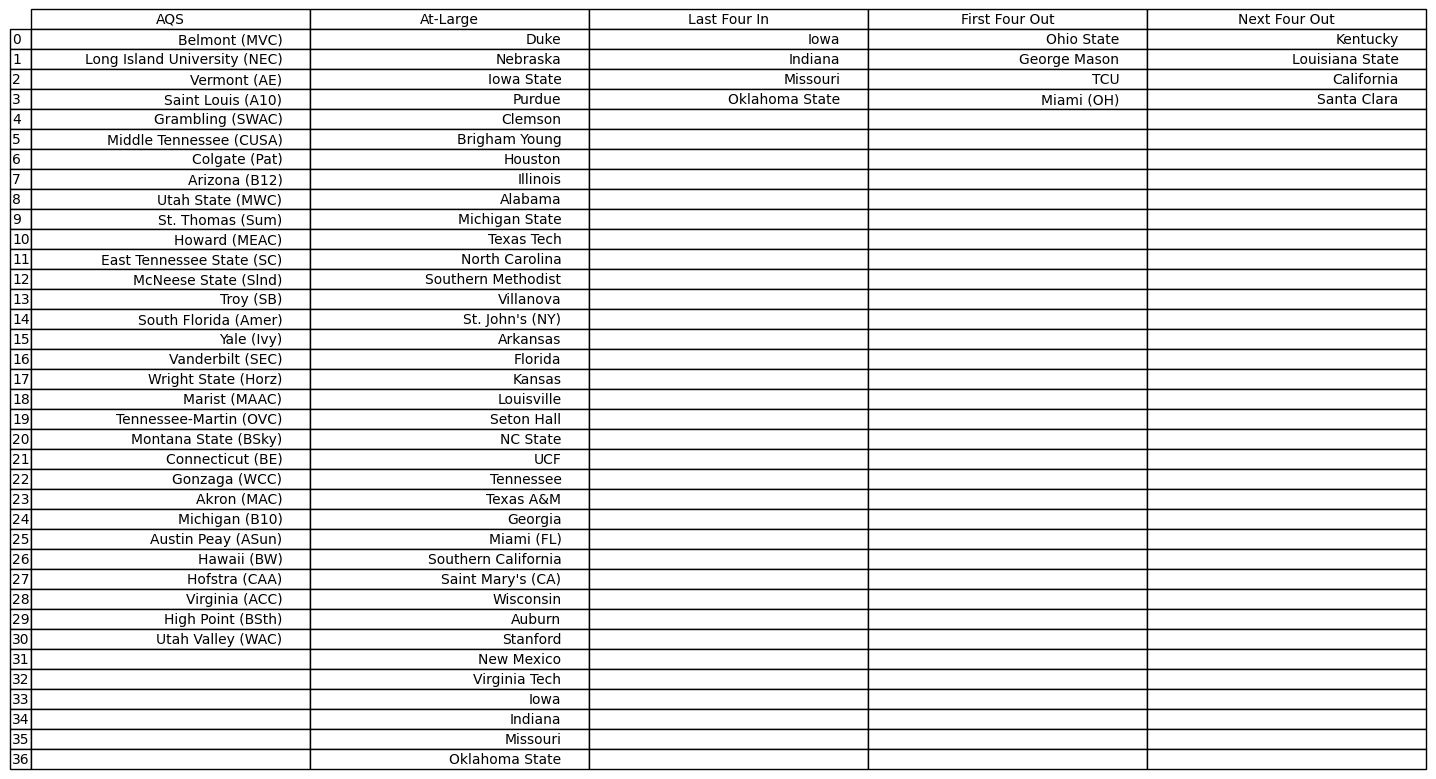

In [113]:
arrz=[]
arr=[]
for t in aqs:
    stry=t+" ("+aqs[t]+")"
    arr.append(stry)
arr.append("")
arr.append("")
arr.append("")
arr.append("")
arr.append("")
arr.append("")
arry=[]
for t in atlarge[:37]:
    arry.append(t)
arri=[]
for t in atlarge[37:41]:
    arri.append(t)
for i in range(0,33):
    arri.append("")
arrii=[]
for t in atlarge[41:45]:
    arrii.append(t)
for i in range(0,33):
    arrii.append("")
arrw=[]
for t in atlarge[33:37]:
    arrw.append(t)
for i in range(0,33):
    arrw.append("")
import numpy as np
arrz = np.stack((arr,arry,arrw,arri,arrii), axis=1)

dfz=pd.DataFrame(arrz,columns=['AQS','At-Large','Last Four In','First Four Out','Next Four Out'])
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table
import numpy as np

# Create a sample DataFrame

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(15, 4)) # Adjust size as needed
ax.xaxis.set_visible(False)  # Hide axes
ax.yaxis.set_visible(False)
ax.set_frame_on(False)      # Hide frame

# Plot the table
tab = table(ax, dfz, loc='center')

# Optional: Adjust font size and scale
tab.auto_set_font_size(False)
tab.set_fontsize(10)
tab.scale(1.2, 1.2) # Scale the table

# Save the figure as a PNG file
plt.savefig('matplotlib_table.png', bbox_inches='tight', dpi=150)
# Make sure to call savefig() before plt.show() (if used)

In [103]:
len(arri)

38

In [ ]:
teamk={}
import numpy as np
for tm in set(df.team.tolist()):
    jk=[]
    for key in pcts:
        jk.append(pcts[key][tm])
    
    
    jk=np.mean(jk)
    teamk[tm]=jk
arrj=[]
teamkz=sorted(teamk,key=teamk.get,reverse=True)
for key in teamkz:
    pfh=float(teamk[key])
    pfh=pfh*100
    pfh=round(pfh,1)
    arrj.append([key,pfh])
    print(key,":",pfh)

In [ ]:
qw=pd.DataFrame(arrj,columns=['team','probability'])
qw=qw.head(100)
qw[qw.team=='Miami OH']

In [ ]:
qw.to_html("probs.html")

In [ ]:
dfw=pd.read_csv("https://ontheroadtovote.com/alarge.csv")
dfw=dfw[dfw.Year>2006]
dfw=dfw[dfw.TY==1]
dfw=dfw.replace("Louisiana State","LSU")
dfw=dfw.replace("Loyola (MD)","Loyola MD")
dfw=dfw.replace("Fairleigh-Dickinson","FDU")
dfw=dfw.replace("Fairleigh Dickinson","FDU")
dfw=dfw.replace("Southern California","USC")
dfw=dfw.replace("Miami (FL)","Miami FL")
dfw=dfw.replace("Brigham Young","BYU")
dfw=dfw.replace("St. John's (NY)","St. John's")
dfw=dfw.replace("Nevada-Las Vegas","UNLV")
dfw=dfw.replace("Saint Mary's (CA)","Saint Mary's")
dfw=dfw.replace("Virginia Commonwealth","VCU")
dfw=dfw.replace("Southern Mississippi","Southern Miss")
dfw=dfw.replace("NC State","N.C. State")
te=set(dfw.Team.tolist())
sr={}

    
df['team']=df['team'].str.replace(" St."," State")
for row in dfw.itertuples():
    if float(row.Year) not in sr:
        sr[float(row.Year)]={}
    sr[float(row.Year)][str(row.Team)]=float(row.TY)
    
for row in df.itertuples():
    if row.team in sr[float(row.season)]:
        df.at[row.Index,'alarge']=sr[float(row.season)][row.team]
    else:
        df.at[row.Index,'alarge']=0
df.to_csv("barts.csv")

In [ ]:
from bs4 import BeautifulSoup
arr=[]
import requests

for s in range(2008,2025):
    s=str(s)
    url="https://barttorvik.com/trank.php?begin="+str(seasons[s][0])+"&end="+str(seasons[s][1])+"&conlimit=All&year="+str(s)+"&top=0&hteam=&quad=5&rpi="
    html=requests.get(url).text
    print(s)
    soup=BeautifulSoup(html)
    table=soup.find_all("table")[0]
    for tr in table.find_all("tr"):
        if "Rk" not in str(tr):
            tds=tr.find_all("td")
            row=[]
            row.append(float(s)-1)
            for i in range(0,len(tds)):
                if i==4:
                    y=tds[i].find("a").text
                    x=tds[i].find("span").text
                    row.append(y)
                    row.append(x)
                else:
                    row.append(tds[i].text)
            arr.append(row)

In [ ]:
!pip install playwright
!playwright install
!playwright install-deps

In [ ]:
seasons={"2008":["20071105","20080316"],"2009":["20081110","20090310"],"2010":["20091109","20100309"],"2011":["20101108","20110313"],"2012":["20111107","20120311"],"2013":["20121109","20130317"],"2014":["20131108","20140316"],"2015":["20141114","20150315"],"2016":["20151113","20160313"],"2017":["20161111","20170312"],"2018":["20171110","20180311"],"2019":["20181106","20190317"],"2021":["20201125","20210314"],"2022":["20211109","20220313"],"2023":["20221107","20230312"],"2024":["20231106","20240317"],"2025":["20241105","20250317"]}
arrw=[]
from playwright.async_api import async_playwright
import asyncio


async def fetch(link):
    async with async_playwright() as p:
        browser=await p.chromium.launch(headless=True)
        page=await browser.new_page()
        await page.goto(link,wait_until="load")
        last=None
        for _ in range(10):
            await page.wait_for_load_state("networkidle")
            new=page.url
            if new==last:
                break
            last=new
        try:
            await page.wait_for_selector("table")
        except Exception as e:
            print(e)
        html=await page.content()
        await browser.close()
        soup=BeautifulSoup(html)
        return soup
from playwright.async_api import async_playwright
from bs4 import BeautifulSoup
import asyncio



async def fetchz(link, context):
    page = await context.new_page()
    await page.route("**/*", lambda route: route.abort() if route.request.resource_type in ["image", "stylesheet", "font"] else route.continue_())
    await page.goto(link, wait_until="domcontentloaded",timeout=0)
    last = None
    for _ in range(10):
        await page.wait_for_load_state("networkidle")
        new = page.url
        if new == last:
            break
        last = new
    try:
        await page.wait_for_selector("table",state="attached")
    except Exception as e:
        print(e)
    element = await page.query_selector("table")
    html = await element.inner_html()
    soup = BeautifulSoup(html, "html.parser")
    await page.close()
    return soup

async def main(link):
    async with async_playwright() as p:
        browser = await p.chromium.launch(headless=True,args=["--disable-gpu", "--no-sandbox"])
        context = await browser.new_context()
        result = await fetchz(link,context)
        await browser.close()
        return result
dates={}
import nest_asyncio
nest_asyncio.apply()
dates=[]
arrw=[]
for i in range(2014,2026):
    if i!=2020:
        dates.append(i)
for s in dates:
    print(s)
    uk=int(s)-1
    s=str(s)
    nj=s.replace(".0","")
    s=s.replace(".0","")
    url="https://barttorvik.com/trank-time-machine.php?date="+str(seasons[nj][1])+"&year="+str(s)
    url="https://barttorvik.com/trank.php?year="+str(s)+"&sort=&hteam=&t2value=&conlimit=All&state=All&begin="+str(seasons[nj][0])+"&end="+str(seasons[nj][1])+"&top=0&revquad=0&quad=5&venue=All&type=All&mingames=0#"
    print(url)
    loop = asyncio.get_event_loop()
    table = loop.run_until_complete(main(url))
    for tr in table.find_all("tr"):
        if "AdjOE" not in str(tr) and 'absolute error' not in str(tr):
            rowz=[]
            n=0
            for td in tr.find_all("td"):
                if n!=4:
                    rowz.append(td.text)
                else:
                    fd=td.find_all("a")[0].text
                    fd=str(fd)
                    if fd=='':
                        print(tr.find_all("td"))
                    rowz.append(fd)
                n+=1
            rowz.append(uk)
            arrw.append(rowz)

In [ ]:
tr.find_all("td")

In [ ]:
len(dfe.columns)

In [ ]:
dfe=pd.DataFrame(arrw)
dfe.columns=['rk','team','net','kpi','sor','avg','bpi','kp','sag','avgz','q1a','q1','q2','q12','q3','q4','season','unnamed col']
for i in range(2018,2026):
    dfe=dfe[dfe.rk!=i]


In [ ]:
import pandas as pd
df=pd.DataFrame(arrw)
df.columns=['RK','team','conf','G','Rec','ADJOE','ADJDE','BARTHAG','EFG','EFGD','TOR','TORD','ORB','DRB','FTR','FTRD','2P','2PD','3P','3PD','3PR','3PRD','ADJT','WAB','season']

In [ ]:
df.to_csv("goodbart.txt")

# GET ALARGE BIDS

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
arr=[]
import time
for i in range(1950,2026):
    y=i-1
    print(i)
    time.sleep(3)
    url="https://www.sports-reference.com/cbb/seasons/men/"+str(i)+"-standings.html"
    html=requests.get(url).text
    html=html.replace("<!--","")
    html=html.replace("-->","")
    soup=BeautifulSoup(html)
    
    for t in soup.find_all("table"):
        for tr in t.find_all("tr"):
            if "Polls" not in str(tr) and "Wins" not in str(tr):
                tds=tr.find_all("td")
                school=tds[0].text
                conf=tds[1].text
                w=tds[2].text
                l=tds[3].text
                pct=tds[4].text
                wc=tds[6].text
                lc=tds[7].text
                pctconf=tds[8].text
                pf=tds[10].text
                pa=tds[11].text
                srs=tds[13].text
                sos=tds[14].text
                if("NCAA Tournament" in str(tr)):
                    if ("Tournament Champion" in str(tr)):
                        m=1
                    else:
                        atlarge=1
                else:
                    atlarge=0
                arr.append([int(y)-1,school,conf,w,l,pct,wc,lc,pctconf,pf,pa,srs,sos,atlarge])



In [ ]:
cdf=pd.DataFrame(arr,columns=['Year','Team','Conf','W','L','PCT','CW','CL','CPCT','PF','PA','SRS','SOS','TY'])
for row in cdf.itertuples():
    cdf.at[row.Index,'Year']=float(row.Year+1)
cdf.to_csv("al.txt")

In [ ]:
import requests
j=requests.get("https://cfbzzz.alwaysdata.net/cookiez.txt")
f=open("cookiez.txt","w")
f.write(str(j.content))

In [ ]:

import yt_dlp
import os

# Define the video URL
video_url = 'https://www.youtube.com/watch?v=3lKW4r2W9Pk'  # Replace with the actual video URL
!yt-dlp --cookies cookies.txt https://www.youtube.com/watch?v=3lKW4r2W9Pk
# yt-dlp configuration options
ydl_opts = {
    'format': 'bestvideo+bestaudio/best',  # Selects the best available video and audio quality
    'merge_output_format': 'mp4',          # Merges the video and audio into an MP4 file
    'outtmpl': '%(title)s.%(ext)s',        # Output file name template (e.g., "Video Title.mp4")
    'noplaylist': True,                    # Ensures only a single video is downloaded, even if it's part of a playlist
    'quiet': False   
    # 'ffmpeg_location': 'C:/path/to/ffmpeg/bin/ffmpeg.exe', # Uncomment and set if FFmpeg is not in PATH
}

try:
    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([video_url])
    print(f"Successfully downloaded: {video_url}")
except Exception as e:
    print(f"An error occurred during download: {e}")

In [ ]:
bartdf=pd.read_csv("https://cfbzzz.alwaysdata.net/bracketology/goodbart.txt")
aldf=pd.read_csv("https://cfbzzz.alwaysdata.net/bracketology/al.txt")
for i in range(2013,2026):
    print(i)
    bartdf=bartdf[bartdf.RK!=i]
bartdf=bartdf.replace('\xa0', ' ', regex=True)
bartdf['ty']=False
for row in bartdf.itertuples():
    if "   " in str(row.team):
        bartdf.at[row.Index,'ty']=True
        teamh=str(row.team).split("   ")[0]
        bartdf.at[row.Index,'team']=teamh
bartdf['team']=bartdf['team'].str.replace(" St."," State")
bartdf=bartdf.replace("Albany","Albany (NY)")
bartdf=bartdf.replace("BYU","Brigham Young")
bartdf=bartdf.replace("Grambling State","Grambling")
bartdf=bartdf.replace("VCU","Virginia Commonwealth")
bartdf=bartdf.replace("Fairleigh Dickinson","FDU")
bartdf=bartdf.replace("SIU Edwardsville","Southern Illinois-Edwardsville")
bartdf=bartdf.replace("LIU","Long Island University")
bartdf=bartdf.replace("Nebraska Omaha","Omaha")
bartdf=bartdf.replace("UMBC","Maryland-Baltimore County")
bartdf=bartdf.replace("Miami FL","Miami (FL)")
bartdf=bartdf.replace("SMU","Southern Methodist")
bartdf=bartdf.replace("Penn","Pennsylvania")
bartdf=bartdf.replace("Arkansas Pine Bluff","Arkansas-Pine Bluff")
bartdf=bartdf.replace("USC Upstate","South Carolina Upstate")
bartdf=bartdf.replace("St. Francis NY","St. Francis (NY)")
bartdf=bartdf.replace("UMKC","Kansas City")
bartdf=bartdf.replace("Central Connecticut","Central Connecticut State")
bartdf=bartdf.replace("Tennessee Martin","Tennessee-Martin")
bartdf=bartdf.replace("Saint Francis","Saint Francis (PA)")
bartdf=bartdf.replace("Illinois Chicago","Illinois-Chicago")
bartdf=bartdf.replace("Bethune Cookman","Bethune-Cookman")
bartdf=bartdf.replace("N.C. State","NC State")
bartdf=bartdf.replace("Charleston","College of Charleston")
bartdf=bartdf.replace("Maryland Eastern Shore","Maryland-Eastern Shore")
bartdf=bartdf.replace("Loyola Chicago","Loyola (IL)")
bartdf=bartdf.replace("Louisiana Monroe","Louisiana-Monroe")
bartdf=bartdf.replace("Southern Miss","Southern Mississippi")
bartdf=bartdf.replace("Texas A&M Corpus Chris","Texas A&M-Corpus Christi")
bartdf=bartdf.replace("Saint Mary's","Saint Mary's (CA)")
bartdf=bartdf.replace("UT Rio Grande Valley","Texas-Rio Grande Valley")
bartdf=bartdf.replace("Gardner Webb","Gardner-Webb")
bartdf=bartdf.replace("LSU","Louisiana State")
bartdf=bartdf.replace("Loyola MD","Loyola (MD)")
bartdf=bartdf.replace("UMass Lowell","Massachusetts-Lowell")
bartdf=bartdf.replace("UNLV","Nevada-Las Vegas")
bartdf=bartdf.replace("USC","Southern California")
bartdf=bartdf.replace("Sam Houston State","Sam Houston")
bartdf=bartdf.replace("Prairie View A&M","Prairie View")
bartdf=bartdf.replace("Miami OH","Miami (OH)")
bartdf=bartdf.replace("VMI","Virginia Military Institute")
bartdf=bartdf.replace("St. John's","St. John's (NY)")
bartdf=bartdf.replace("FIU","Florida International")
bartdf=bartdf.replace("Queens","Queens (NC)")
bartdf=bartdf.replace("Cal Baptist","California Baptist")
bartdf=bartdf.replace("Mount State Mary's","Mount St. Mary's")
alargez={}
for i in range(1949,2026):
    alargez[float(i)]=[]
for row in aldf.itertuples():
    if float(row.TY)==1:
        alargez[float(row.Year)].append(row.Team)
for row in bartdf.itertuples():
    if row.team in alargez[float(row.season)]:
        bartdf.at[row.Index,'alarge']=1
    elif row.ty==True:
        bartdf=bartdf.drop(row.Index)
    else:
        bartdf.at[row.Index,'alarge']=0
row.Unnamed: 0,row.RK,row.team,row.conf,row.G,row.Rec,row.ADJOE,row.ADJDE,row.BARTHAG,row.EFG,row.EFGD,row.TOR,row.TORD,row.ORB,row.DRB,row.FTR,row.FTRD,row.2P,row.2PD,row.3P,row.3PD,row.3PR,row.3PRD,row.ADJT,row.WAB,row.season,row.ty,row.alarge

In [ ]:
tyz=""
for c in bartdf.columns:
    tyz+=("row."+c+",")

In [ ]:
tyz

In [ ]:
for t in set(bartdf.team.tolist()):
    if t not in set(aldf.Team.tolist()):
        print('bartdf=bartdf.replace("'+t+'","")')

In [ ]:
kl=bartdf.head(1)
set(kl.team.tolist())